In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import numpy as np
from src.data import PancreasDataset
from src.utils.config import load_config
from src.data.transforms import build_transforms_from_config

In [3]:
os.getcwd()

'C:\\Users\\Usuario\\TFG\\digipanca\\notebooks\\preprocessing'

In [4]:
os.chdir('C:\\Users\\Usuario\\TFG\\digipanca\\')
os.getcwd()

'C:\\Users\\Usuario\\TFG\\digipanca'

In [9]:
config = load_config()
RAW_DIR = config['data']['raw_dir']
transform_config =config.get('transforms', None)
transform = build_transforms_from_config(transform_config)
ds = PancreasDataset(
        data_dir=RAW_DIR,
        split_file='data/splits/one.json',
        split_type='train',
        transform=transform
    )

📊 Loading dataset (train)... 1 patients found.
📊 Dataset loaded with 55 slices.


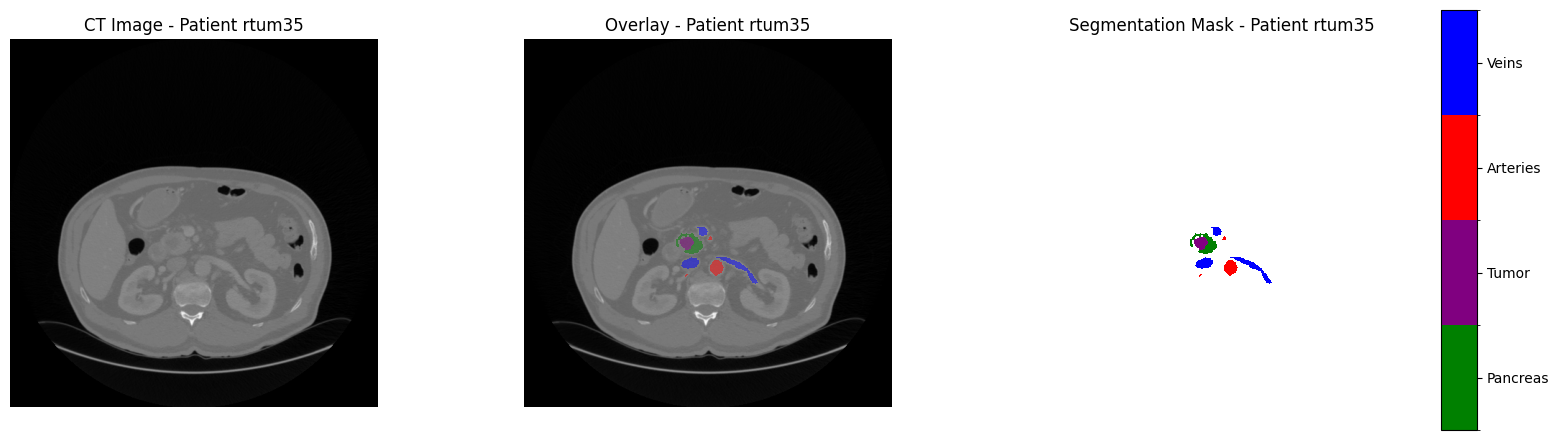

In [10]:
from src.utils.visualization import visualize_sample
visualize_sample(ds, 28, alpha=0.5, zoom=0.0)

In [11]:
normal_img, _, _ = ds[28]

In [12]:
import matplotlib.pyplot as plt

def apply_window(image, window_level, window_width):
    """ Adjust the window level and window width for better visualization. """
    min_val = window_level - (window_width / 2)
    max_val = window_level + (window_width / 2)
    windowed_image = np.clip(image, min_val, max_val)
    return (windowed_image - min_val) / (max_val - min_val)

def vis(image):
    wimg = apply_window(image, 50, 400)
    image = np.array(image.squeeze())
    wimg = np.array(image.squeeze())

    # Calcular la diferencia entre imágenes
    diff = np.abs(image - wimg)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # 1. Imagen CT original
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('CT Normal Image')
    axes[0].axis('off')
    
    # 2. Imagen CT con ventana aplicada
    axes[1].imshow(wimg, cmap='gray')
    axes[1].set_title('CT Windowed Image')
    axes[1].axis('off')

    # 3. Diferencia entre ambas imágenes
    axes[2].imshow(diff, cmap='hot')  # 'hot' para destacar diferencias
    axes[2].set_title('Difference (Original - Windowed)')
    axes[2].axis('off')

    plt.show()

    # Cálculos de diferencia
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    max_diff = np.max(diff)

    print(f'Difference Analysis:')
    print(f'  - Mean difference: {mean_diff:.4f}')
    print(f'  - Standard deviation: {std_diff:.4f}')
    print(f'  - Max difference: {max_diff:.4f}')


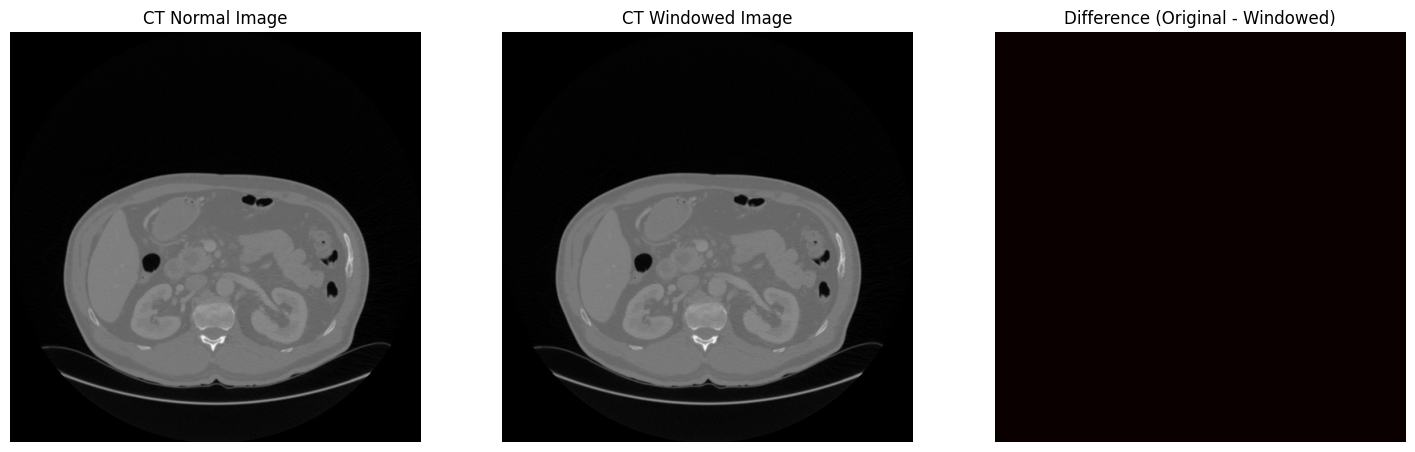

Difference Analysis:
  - Mean difference: 0.0000
  - Standard deviation: 0.0000
  - Max difference: 0.0000


In [13]:
vis(normal_img)